# Interpolation

#### Class 8 (Computational Physics; Date: 06 Feb 2025)
#### Notes by Vikram Khaire

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

* Let's create some data \
we will define a function y(x) and create an X and Y array using it \
note in reality you don't know the function -- you just get the X-array and Y-array 

In [2]:
def polynomial_function(x):
    f = x**3 - x**2 + 10  # an arbritray polynomial
    return f

In [3]:
# create an X array and get the Y using the above function
x = np.arange(-5, 5, 1)
# Always print to see what you get if you do not remember the syntax
y = polynomial_function(x)

Text(0, 0.5, 'y')

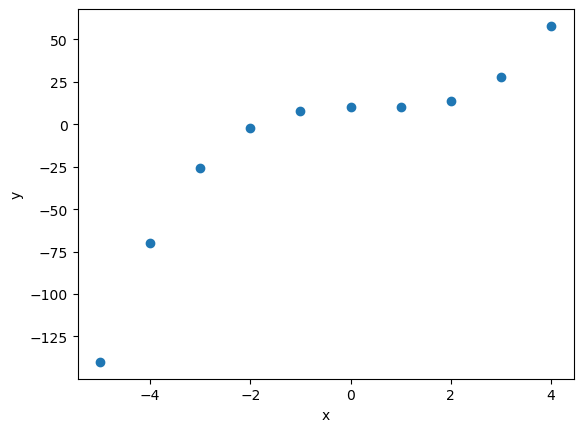

In [4]:
# Let's plot to see how it looks
plt.scatter(x, y) # plt.scatter plots a scatter plot instead of a line
plt.xlabel('x')
plt.ylabel('y')

#### the question?
What is y for x =3.14? \
Given that you only data x array and y array

## 1. Nearest Neighbour Interpolation (NNI)
y (x) $\approx$ y (nearest x in the x-array)

#### Let's write code to find the nearest neighbor to x 
The idea is following \ 
Take the absolute difference between every element of x-array and x \
The element for which the difference is minimum would be the closest \
To find the argument (i.e index) of minimum number use numpy.argmin function


In [5]:
# Let's write a function for nearest point
def nearest_point(x_array, x):
    abs_difference_array =  np.abs(x_array - x)
    i = np.argmin(abs_difference_array)
    return i

In [6]:
# testing function on some arbritray array
a = np.array([3, 2.1, 5, 7, 3.1, 9, 1.5, 6]) # an arbritray array
# find nearest point to 3.14
ind = nearest_point(a, 3.14) 
print('index =', ind, 'nearest value =', a[ind])

index = 4 nearest value = 3.1


In [7]:
# therefore in our question y(3.14) would be:
ind = nearest_point(x, 3.14)
result = y[ind]
print('y(3.14) =', result)

y(3.14) = 28


In [8]:
# Because we know the function we can see how close we are
res = polynomial_function(3.14)
print('correct y (3.14) is', res)

correct y (3.14) is 31.099544


In [9]:
#In conclusion we are quite close! 28 vs. 31 

## 2. Linear Interpolation

Equation of line $y = mx + c$. \
Find two points $(x_0, y_0)$ and $(x_1, y_1)$ where $x_0<x\le x_1$

The formula to use is: \
$ y =  y_0 L_0 + y_1 L_1$ \
where \
$L_0 = \frac{(x-x_1)}{(x_0-x_1)}$ \
$L_1 = \frac{(x-x_0)}{(x_1-x_0)}$


In [10]:
# Lets find two nearest points with x0 < x < x1  --> one needs to be careful here 
# Let's take one example
ind = nearest_point(x, 3.14) 
print('index =', ind, 'nearest value =', x[ind])
# we get a point x0 here becasue x0 < x

index = 8 nearest value = 3


In [11]:
# Let's take another example
ind = nearest_point(x, 3.6) 
print('index =', ind, 'nearest value =', x[ind])
# now we get a point x1 here becasue x1 > x

index = 9 nearest value = 4


* From about two examples it is clear that we need to be careful to find which is x0 and which is x1
* So lets use if condition and write a small function to do this. Later we will use this in our code


In [12]:
def find_nearest_two_indices(x_array, x):
    ind = nearest_point(x_array, x)
    if x_array[ind] > x: 
        ind_x1 = ind
        ind_x0 = ind - 1
    else:
        ind_x0 = ind
        ind_x1 = ind + 1
        
    return ind_x0, ind_x1

# note that this function will be useless if the index 'ind' is either the first or last element of x 
# homework for you is to modify it to accommodate this issue in it

In [13]:
# Let's test it
i, j = find_nearest_two_indices(x, 3.14)
print ('x0 =', x[i], 'and  x1 =', x[j])

x0 = 3 and  x1 = 4


In [14]:
# Let's test it
i, j = find_nearest_two_indices(x, 3.64)
print ('x0 =', x[i], 'and  x1 =', x[j])

x0 = 3 and  x1 = 4


* The above function works (but see the note below the function)
* Now lets write the linear interpolation function

In [15]:
def linear_interpolation(x_array, y_array, x):
    
    i, j = find_nearest_two_indices(x_array, x)
    
    x0 = x_array[i]
    y0 = y_array[i]

    x1 = x_array[j]
    y1 = y_array[j]

    L0 = (x-x1)/(x0-x1)
    L1 = (x-x0)/(x1-x0)

    y = y0*L0 + y1*L1

    return y
    

In [16]:
# Lets test it
res = linear_interpolation(x, y, 3.14)
print('result =', res)

result = 32.2


In [17]:
# Because we know the function we can see how close we are
res = polynomial_function(3.14)
print('correct y (3.14) is', res)

correct y (3.14) is 31.099544


In [18]:
# now we are even closer 31.1 vs 32.2

## 3. Quadratic interpolation

Equation of line $y = ax^2 + bx +c$. We want to find a, b & c for given three points $(x_0, y_0)$, $(x_1, y_1)$ and $(x_2, y_2)$

* solution is 

$y = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x)$ 

$L_0 = \frac{(x-x_1)(x-x_2)}{(x_0-x_1) (x_0-x_2)}$

$L_1 = \frac{(x-x_0)(x-x_2)}{(x_1-x_0) (x_1-x_2)}$

$L_2 = \frac{(x-x_0)(x-x_1)}{(x_2-x_0) (x_2-x_1)}$


## 4. Higher degree polynomial interpolation

Equation of curve is n degree polynomial. Get $n+1$ points $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$

* solution is 

$y = y_0 L_0(x) + y_1 L_1(x) + ... + y_n L_n(x)$ 

$L_0 = \frac{(x-x_1)(x-x_2)\, ... \,(x-x_n)}{(x_0-x_1) (x_0-x_2) \, ... \, (x_0-x_n)}$

$L_1 = \frac{(x-x_0)(x-x_2)\, ... \,(x-x_n)}{(x_1-x_0) (x_1-x_2)\, ... \, (x_1-x_n)}$

.
.
.

